<a href="https://colab.research.google.com/github/fatisepah/samples/blob/main/Lenet_Skippy_WeightFloat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 2

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)





#Defining the convolutional neural network
class LeNet5(nn.Module):

    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0),
            nn.ReLU()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=num_classes),
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        out = self.classifier(x)

        return out


model = LeNet5(num_classes).to(device)

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)


100%|██████████| 9912422/9912422 [00:00<00:00, 67833416.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45625496.73it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23230686.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3715001.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
torch.save(model.state_dict(),'/content/drive/MyDrive/lenet-weight/trained_weight_file3.pt')

In [3]:
model_new = LeNet5(num_classes).to(device)
model_new.load_state_dict(torch.load('/content/drive/MyDrive/lenet-weight/trained_weight_file3.pt'))

<All keys matched successfully>

In [4]:
WeightConv1=np.asarray(model.state_dict()['feature_extractor.0.weight'])
WeightConv2=np.asarray(model.state_dict()['feature_extractor.3.weight'])
WeightConv3=np.asarray(model.state_dict()['feature_extractor.6.weight'])
BiasConv1=np.asarray(model.state_dict()['feature_extractor.0.bias'])
BiasConv2=np.asarray(model.state_dict()['feature_extractor.3.bias'])
BiasConv3=np.asarray(model.state_dict()['feature_extractor.6.bias'])
WeightFC1=np.asarray(model.state_dict()['classifier.0.weight'])
WeightFC2=np.asarray(model.state_dict()['classifier.2.weight'])
BiasFC1=np.asarray(model.state_dict()['classifier.0.bias'])
BiasFC2=np.asarray(model.state_dict()['classifier.2.bias'])

In [5]:
1# print("WeightConv1=",WeightConv1)
print("WeightConv1=",WeightConv1.shape)
print("WeightConv2=",WeightConv2.shape)
print("WeightConv3=",WeightConv3.shape)
print("BiasConv1=",BiasConv1.shape)
print("BiasConv2=",BiasConv2.shape)
print("BiasConv3=",BiasConv3.shape)
print("WeightFC1=",WeightFC1.shape)
print("WeightFC2=",WeightFC2.shape)
print("BiasFC1=",BiasFC1.shape)
print("BiasFC2=",BiasFC2.shape)

WeightConv1= (6, 1, 5, 5)
WeightConv2= (16, 6, 5, 5)
WeightConv3= (120, 16, 5, 5)
BiasConv1= (6,)
BiasConv2= (16,)
BiasConv3= (120,)
WeightFC1= (84, 120)
WeightFC2= (10, 84)
BiasFC1= (84,)
BiasFC2= (10,)


In [6]:
import numpy as np


In [7]:
class Convolution2D1:

    def __init__(self, inputs_channel, num_filters, kernel_size, padding, stride):
        # weight size: (F, C, K, K)
        # bias size: (F) 
        self.F = num_filters
        self.K = kernel_size
        self.C = inputs_channel
        
        # print("FInConv=",self.F) #eeeeeeeeeeeeeeeeeeen
        # print("KInConv=",self.K) #eeeeeeeeeeeeeeeeeeen
        # print("CInConv=",self.C) #eeeeeeeeeeeeeeeeeeen

        # print("In Conv's Init") #eeeeeeeeeeeeeeeeeeen



        self.weights = np.zeros((self.F, self.C, self.K, self.K))
        self.bias = np.zeros((self.F, 1))
        # for i in range(0,self.F):
        #     self.weights[i,:,:,:] = np.random.normal(loc=0, scale=np.sqrt(1./(self.C*self.K*self.K)), size=(self.C, self.K, self.K))

        self.weights=WeightConv1
        self.bias=BiasConv1
        print("weightsConvLayer111=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")





        # print("weightsConvLayerBeforInt=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")


        # for f in range(self.F):
        #   for c in range(self.C):
        #     for h in range(self.K):
        #       for w in range(self.K):
        #         self.weights[f,c,h,w]=int(self.weights[f,c,h,w]*255)


        # self.weights=int(self.weights*31)
        # print("weightsShapeConvLayer=",self.weights.shape)  #eeeeeeeeeeeeeeeeeeen
        print("weightsConvLayerAfterMult31=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")
        # self.weights=self.weights.astype(int)
        # print("weightsShapeConvLayer=",self.weights.shape) 
        print("weightsConvLayerAfterInt=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")

        self.p = padding
        self.s = stride

        # print("F(num_filters)ConvLayer=",self.F)
        # print("K(kernel_size)ConvLayer=",self.K)
        # print("C(inputs_channel)ConvLayer=",self.C)

    def zero_padding(self, inputs, size):
        w, h = inputs.shape[0], inputs.shape[1]
        new_w = 2 * size + w
        new_h = 2 * size + h
        out = np.zeros((new_w, new_h))
        out[size:w+size, size:h+size] = inputs

        

        # print("outShapezeropadding=",out.shape)  #eeeeeeeeeeeeeeeeeeen
        return out


    def forward(self, inputs):#Stochastic
        # input size: (C, W, H)
        # output size: (N, F ,WW, HH)
        print("inputOfConvLayer=",inputs)   #eeeeeeeeeeeeeeeeeeen
        print("inputShapeOfConvLayer=",inputs.shape)

        # print("In Conv's forwardStocahstic")

        C = inputs.shape[0]
        W = inputs.shape[1]+2*self.p
        H = inputs.shape[2]+2*self.p

        

        print("weights=",self.weights)

        # self.weights=self.weights.astype(int)
        # print("weightsAfterInt=",self.weights)


        XBit=8
        sign=1
        XYInputBuf=inputs.shape
        # print("XYInputBuf",inputs.shape)
        XInputBuf= XYInputBuf[1]+2*self.p
        YInputBuf= XYInputBuf[2]+2*self.p
        # print("XInputBuf",XInputBuf)
        # print("YInputBuf",YInputBuf)

        #find dimention of weight buffer
        XYWeightBuf=self.weights.shape
        XWBuf= XYWeightBuf[2]
        YWBuf= XYWeightBuf[3]
        lenWeight=len(self.weights)

        ArrayMulReshape=np.array([])
        ListKeyWeight=[]
        DicWeight={}
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def UpDownCounter(Enable,x,IncDec):
          IntX=int(x)
          Enable=int(Enable)
          
          if Enable != 0:
            if IntX == 1:
              if IncDec == 1:
                IntX=1
              else:
                IntX=-1
            else:
              IntX=0
          else:
            IntX=0
          return IntX
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def DownCounter(x):
          x-=1
          return x
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def BISC(In):
          # print("InBISC",In)
          LenSc= 2 ** XBit
          
          sc=np.array([])
          for x in range(LenSc):
            sc=np.append(sc,[0])
            
          for x in range(XBit):
            i=(2 ** x)-1
            while i<LenSc:
              sc[i] = In[x]
              i+= 2 ** (x+1)
              
          sc = np.flip(sc)
          return sc
          
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def DecimalToBinary(num,XBit):
          i = 0
          bnum = []
          Binary=''
          while num!=0:
            rem = num%2
            bnum.insert(i, rem)
            i = i+1
            num = int(num/2)
          i = i-1
          while i>=0:
            Binary=Binary+str(bnum[i])
            i = i-1
          
          while len(Binary)<XBit:
            Binary='0'+Binary
          # print("Binary:",Binary)
          
          return Binary
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def GetDefferentialWArray(w):
          DifferentialWArray=np.array([])
          
          #sort weight 1-D
          WeightSortArray1D=np.sort(w)
          print("WeightSortArray1D=",WeightSortArray1D)  #eeeeeeeeeeeeeeeeeeen
          
          #create sorted weight array based on Differential of weights
          
          DifferentialWArray=np.append(DifferentialWArray,WeightSortArray1D[0])
          for x in range((XWBuf*YWBuf)-1):
            Differential=WeightSortArray1D[x+1]-WeightSortArray1D[x]
            DifferentialWArray=np.append(DifferentialWArray,Differential)
          print("DifferentialWArray=",DifferentialWArray)   #eeeeeeeeeeeeeeeeeeen
          
          return DifferentialWArray
          
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def SortDicIndexWeight(w):
          w=np.reshape(w,(XWBuf,YWBuf))
          # print("WInSortDicShape=",w.shape)
          # print("XWBuf=",XWBuf)
          # print("YWBuf=",YWBuf)
          for x in range(XWBuf):
            for y in range(YWBuf):
              str=x,y
              # print("str",str)
              # print("w[x,y]",w[x,y])
              DicWeight[str]=w[x,y]
              
          #sort dic of weight baes on value:dic(key,value)
          DicWSort=dict(sorted(DicWeight.items(), key=lambda item: item[1]))
          print("DicWSort=",DicWSort)   #eeeeeeeeeeeeeeeeeeen
          
          for x in range(XWBuf*YWBuf):
            ListKeyWeight.append(list(DicWSort.keys())[x])
            
          # print("ListKeyWeight=",ListKeyWeight)
            
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        #function for doing the functional of PE in skippy based on BISC & Uo/Down counter & Down counter
        def Mul(InputBuffer,WeightBuffer):
          OutputArray=np.array([])
          print("WeightBufferBeforReshape=",WeightBuffer)  #eeeeeeeeeeeeeeeeeeen
          WeightBuffer=np.reshape(WeightBuffer,(XWBuf,YWBuf))
          # print("WeightBufferAfterReshape=",WeightBuffer)

          # print("InputBuffershapeBefor=",InputBuffer.shape)
          InputBuffer=np.reshape(InputBuffer,(XInputBuf,YInputBuf))
          print("InputBuffershapeAfter=",InputBuffer.shape)  #eeeeeeeeeeeeeeeeeeen

          #reshape WeightSortArray to 1-D
          WeightBuffer1D=WeightBuffer.reshape(-1)
          print("WeightBuffer1D=",WeightBuffer1D)   #eeeeeeeeeeeeeeeeeeen
          DifferentialW=GetDefferentialWArray(WeightBuffer1D)
          
          
          SortDicIndexWeight(WeightBuffer)
          
          for x in range((XInputBuf-XWBuf)+1):
            for y in range((YInputBuf-YWBuf)+1):
              
              SelectIn=InputBuffer[x:XWBuf+x ,y:YWBuf+y]
              # print("SelectInShape=",SelectIn.shape)
              # print("SelectIn=",SelectIn)
              
              SumOut=0
              
              for a in range(XWBuf):
                for b in range(YWBuf):
                  LenDiffW= len(DifferentialW)
                  SumList=[]
                  
                  for s in range(LenDiffW):
                    SumList.append(0)

                  X=SelectIn[a,b]
                  XBinary=DecimalToBinary(X,XBit)
                    
                  SC=BISC(XBinary)
                  andisY=0
                    
                  # print("LenDiffW",LenDiffW)
                  for z in range(LenDiffW):
                    andisSC=0
                    # print("z",z)
                      
                    ValWInDiffFloat=DifferentialW[z]
                    ValWInDiff=ValWInDiffFloat*255

                      
                    if ValWInDiff == 0:
                      if z==0:
                        SumList[andisY]=0
                      else:
                        SumList[andisY]=SumList[andisY-1]
                      andisY+=1
                      continue						
                        
                    #instantiating the variable of sign holder 
                    #if sign=0, number is negative & sign=1, number is positive
                      
                    if ValWInDiff<0:
                      sign=0
                      ValWInDiff=abs(ValWInDiff)
                    else:
                      sign=1
                        
                    sum=0
                    while ValWInDiff>0:
                        
                      OutUDCounter=UpDownCounter(ValWInDiff,SC[(len(SC)-1)-andisSC],sign)
                      andisSC+=1
                      ValWInDiff=DownCounter(ValWInDiff)
                      sum=sum+OutUDCounter
                        
                        
                    if z==0:
                      SumList[andisY]=sum
                    else:
                      SumList[andisY]=SumList[andisY-1]+sum
                    andisY+=1

                  # print("SumList=",SumList)
                    
                  Index=ListKeyWeight.index((a,b))
                  val=SumList[Index]
                  # print("ValIndex=",val)	
                  SumOut=SumOut+val
                  if SumOut >= (2**XBit):
                    SumOut=2**XBit
                    break
                  if SumOut <= -(2**XBit):
                    SumOut=-(2**XBit)
                    break
              # print("SumOut=",SumOut)
                
              #two lines for compute the last result baesd on stochastic(divide on 2**XBit)
              # SumOut=SumOut/2**XBit
              # print("SumOut=",SumOut)	
                
              OutputArray=np.append(OutputArray,SumOut)
                
          # print("OutputArray=",OutputArray)
          NewOutputArray=OutputArray.reshape((XInputBuf-XWBuf)+1,(YInputBuf-YWBuf)+1)
          # print("NewOutputArray=",NewOutputArray)
          print("NewOutputArrayShape=",NewOutputArray.shape)     #eeeeeeeeeeeeeeeeeeen
          return NewOutputArray


#////////////////////////////////////////////////////////////////////////////////////////////////////////

        self.inputs = np.zeros((C, W, H))
        # print("self.inputsConv=",self.inputs)

        for c in range(inputs.shape[0]):
            self.inputs[c,:,:] = self.zero_padding(inputs[c,:,:], self.p)
        # print("OutshapeZero_padding=",self.inputs.shape)

        # for c in range(C):
        #   for w in range(W):
        #     for h in range(H):
        #       self.inputs[c,w,h]= int(self.inputs[c,w,h]*255)

        self.inputs= self.inputs.astype(int)

        print("inputOfConvLayer=",self.inputs)   #eeeeeeeeeeeeeeeeeeen
        # print("inputShapeOfConvLayer=",self.inputs.shape)

        #############  
        WW =int((W - self.K)/self.s + 1)
        # print("WW=",WW)
        ##########
        HH = int((H - self.K)/self.s + 1)
        # print("HH=",HH)



        feature_maps = np.zeros((self.F, WW, HH))
        # print("feature_mapsShapeOfConvLayerzero=",feature_maps.shape)

        # print("FInConvInForward=",self.F)


        for f in range(self.F):
          SumArrayF = np.zeros((WW, HH))
          for c in range(self.C):
            # print("f=",f)
            # print("c=",c)

            # print("inputssShape=",self.inputs[c,:,:].shape)
            print("inputs=",self.inputs[c,:,:])   #eeeeeeeeeeeeeeeeeeen
            # weights=np.reshape(self.weights[f,:,:,:],(XWBuf,YWBuf))
            print("weights=",self.weights[f,c,:,:])  #eeeeeeeeeeeeeeeeeeen
            # print("OUTMulShape",np.array(Mul(self.inputs[c,:,:],self.weights[f,c,:,:])).shape)
            SumArrayF[:,:]=np.array(SumArrayF)+np.array(Mul(self.inputs[c,:,:],self.weights[f,c,:,:]))
            # print("SumArrayFShape=",SumArrayF[:,:].shape)
            # print("SumArrayF=",SumArrayF[:,:])


          # print("SumArrayFShapeOUT=",SumArrayF.shape)
          # print("SumArrayF=",SumArrayF)
          
          feature_maps[f,:,:]=SumArrayF[:,:]+self.bias[f]
            
        print("feature_mapsShapeOfConvLayer=",feature_maps.shape)
        

        return feature_maps
    

    def backward(self, output_error, learning_rate):
        # print("output_errorInBackConvShape=",output_error.shape)

        C, W, H = self.inputs.shape
        # print("inputsconvvvv.shape=",self.inputs.shape)

        WW =int((W - self.K)/self.s + 1)
        # print("WW=",WW)
        ##########
        HH = int((H - self.K)/self.s + 1)
        # print("HH=",HH)

        self.weights=self.weights.astype(float)


        dx = np.zeros(self.inputs.shape)
        dw = np.zeros(self.weights.shape)
        db = np.zeros(self.bias.shape)


        F= output_error.shape[0]
        # print("F=",F,"ForOutputErrorShapeInBackConv")
        output_error=np.reshape(output_error,(F,WW,HH))
        
        # print("output_errorInBackConvShape=",output_error.shape)

        for f in range(F):
            for w in range(0, WW, self.s):
                for h in range(0, HH, self.s):
                    dw[f,:,:,:]+=output_error[f,w,h]*self.inputs[:,w:w+self.K,h:h+self.K]
                    dx[:,w:w+self.K,h:h+self.K]+=output_error[f,w,h]*self.weights[f,:,:,:]

        for f in range(F):
            db[f] = np.sum(output_error[f, :, :])

        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db
        # print("conv's backward is done")
        return dx

    def extract(self):
        return {self.name+'.weights':self.weights, self.name+'.bias':self.bias}

    def feed(self, weights, bias):
        self.weights = weights
        self.bias = bias

In [8]:
class Convolution2D2:

    def __init__(self, inputs_channel, num_filters, kernel_size, padding, stride):
        # weight size: (F, C, K, K)
        # bias size: (F) 
        self.F = num_filters
        self.K = kernel_size
        self.C = inputs_channel
        
        # print("FInConv=",self.F) #eeeeeeeeeeeeeeeeeeen
        # print("KInConv=",self.K) #eeeeeeeeeeeeeeeeeeen
        # print("CInConv=",self.C) #eeeeeeeeeeeeeeeeeeen

        # print("In Conv's Init") #eeeeeeeeeeeeeeeeeeen



        self.weights = np.zeros((self.F, self.C, self.K, self.K))
        self.bias = np.zeros((self.F, 1))
        # for i in range(0,self.F):
        #     self.weights[i,:,:,:] = np.random.normal(loc=0, scale=np.sqrt(1./(self.C*self.K*self.K)), size=(self.C, self.K, self.K))


        self.weights=WeightConv2
        self.bias=BiasConv2
        print("weightsConvLayer222=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")






        # print("weightsConvLayerBeforInt=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")


        # for f in range(self.F):
        #   for c in range(self.C):
        #     for h in range(self.K):
        #       for w in range(self.K):
        #         self.weights[f,c,h,w]=int(self.weights[f,c,h,w]*255)

        # self.weights=int(self.weights*31)
        # print("weightsShapeConvLayer=",self.weights.shape)  #eeeeeeeeeeeeeeeeeeen
        print("weightsConvLayerAfterMult31=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")
        # self.weights=self.weights.astype(int)
        # print("weightsShapeConvLayer=",self.weights.shape) 
        print("weightsConvLayerAfterInt=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")

        self.p = padding
        self.s = stride

        # print("F(num_filters)ConvLayer=",self.F)
        # print("K(kernel_size)ConvLayer=",self.K)
        # print("C(inputs_channel)ConvLayer=",self.C)

    def zero_padding(self, inputs, size):
        w, h = inputs.shape[0], inputs.shape[1]
        new_w = 2 * size + w
        new_h = 2 * size + h
        out = np.zeros((new_w, new_h))
        out[size:w+size, size:h+size] = inputs

        

        # print("outShapezeropadding=",out.shape)  #eeeeeeeeeeeeeeeeeeen
        return out


    def forward(self, inputs):#Stochastic
        # input size: (C, W, H)
        # output size: (N, F ,WW, HH)
        print("inputOfConvLayer=",inputs)   #eeeeeeeeeeeeeeeeeeen
        print("inputShapeOfConvLayer=",inputs.shape)

        # print("In Conv's forwardStocahstic")

        C = inputs.shape[0]
        W = inputs.shape[1]+2*self.p
        H = inputs.shape[2]+2*self.p

        

        print("weights=",self.weights)

        # self.weights=self.weights.astype(int)
        # print("weightsAfterInt=",self.weights)


        XBit=5
        sign=1
        XYInputBuf=inputs.shape
        # print("XYInputBuf",inputs.shape)
        XInputBuf= XYInputBuf[1]+2*self.p
        YInputBuf= XYInputBuf[2]+2*self.p
        # print("XInputBuf",XInputBuf)
        # print("YInputBuf",YInputBuf)

        #find dimention of weight buffer
        XYWeightBuf=self.weights.shape
        XWBuf= XYWeightBuf[2]
        YWBuf= XYWeightBuf[3]
        lenWeight=len(self.weights)

        ArrayMulReshape=np.array([])
        ListKeyWeight=[]
        DicWeight={}
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def UpDownCounter(Enable,x,IncDec):
          IntX=int(x)
          Enable=int(Enable)
          
          if Enable != 0:
            if IntX == 1:
              if IncDec == 1:
                IntX=1
              else:
                IntX=-1
            else:
              IntX=0
          else:
            IntX=0
          return IntX
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def DownCounter(x):
          x-=1
          return x
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def BISC(In):
          # print("InBISC",In)
          LenSc= 2 ** XBit
          
          sc=np.array([])
          for x in range(LenSc):
            sc=np.append(sc,[0])
            
          for x in range(XBit):
            i=(2 ** x)-1
            while i<LenSc:
              sc[i] = In[x]
              i+= 2 ** (x+1)
              
          sc = np.flip(sc)
          return sc
          
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def DecimalToBinary(num,XBit):
          i = 0
          bnum = []
          Binary=''
          while num!=0:
            rem = num%2
            bnum.insert(i, rem)
            i = i+1
            num = int(num/2)
          i = i-1
          while i>=0:
            Binary=Binary+str(bnum[i])
            i = i-1
          
          while len(Binary)<XBit:
            Binary='0'+Binary
          # print("Binary:",Binary)
          
          return Binary
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def GetDefferentialWArray(w):
          DifferentialWArray=np.array([])
          
          #sort weight 1-D
          WeightSortArray1D=np.sort(w)
          print("WeightSortArray1D=",WeightSortArray1D)  #eeeeeeeeeeeeeeeeeeen
          
          #create sorted weight array based on Differential of weights
          
          DifferentialWArray=np.append(DifferentialWArray,WeightSortArray1D[0])
          for x in range((XWBuf*YWBuf)-1):
            Differential=WeightSortArray1D[x+1]-WeightSortArray1D[x]
            DifferentialWArray=np.append(DifferentialWArray,Differential)
          print("DifferentialWArray=",DifferentialWArray)   #eeeeeeeeeeeeeeeeeeen
          
          return DifferentialWArray
          
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def SortDicIndexWeight(w):
          w=np.reshape(w,(XWBuf,YWBuf))
          # print("WInSortDicShape=",w.shape)
          # print("XWBuf=",XWBuf)
          # print("YWBuf=",YWBuf)
          for x in range(XWBuf):
            for y in range(YWBuf):
              str=x,y
              # print("str",str)
              # print("w[x,y]",w[x,y])
              DicWeight[str]=w[x,y]
              
          #sort dic of weight baes on value:dic(key,value)
          DicWSort=dict(sorted(DicWeight.items(), key=lambda item: item[1]))
          print("DicWSort=",DicWSort)   #eeeeeeeeeeeeeeeeeeen
          
          for x in range(XWBuf*YWBuf):
            ListKeyWeight.append(list(DicWSort.keys())[x])
            
          # print("ListKeyWeight=",ListKeyWeight)
            
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        #function for doing the functional of PE in skippy based on BISC & Uo/Down counter & Down counter
        def Mul(InputBuffer,WeightBuffer):
          OutputArray=np.array([])
          print("WeightBufferBeforReshape=",WeightBuffer)  #eeeeeeeeeeeeeeeeeeen
          WeightBuffer=np.reshape(WeightBuffer,(XWBuf,YWBuf))
          # print("WeightBufferAfterReshape=",WeightBuffer)

          # print("InputBuffershapeBefor=",InputBuffer.shape)
          InputBuffer=np.reshape(InputBuffer,(XInputBuf,YInputBuf))
          print("InputBuffershapeAfter=",InputBuffer.shape)  #eeeeeeeeeeeeeeeeeeen

          #reshape WeightSortArray to 1-D
          WeightBuffer1D=WeightBuffer.reshape(-1)
          print("WeightBuffer1D=",WeightBuffer1D)   #eeeeeeeeeeeeeeeeeeen
          DifferentialW=GetDefferentialWArray(WeightBuffer1D)
          
          
          SortDicIndexWeight(WeightBuffer)
          
          for x in range((XInputBuf-XWBuf)+1):
            for y in range((YInputBuf-YWBuf)+1):
              
              SelectIn=InputBuffer[x:XWBuf+x ,y:YWBuf+y]
              # print("SelectInShape=",SelectIn.shape)
              # print("SelectIn=",SelectIn)
              
              SumOut=0
              
              for a in range(XWBuf):
                for b in range(YWBuf):
                  LenDiffW= len(DifferentialW)
                  SumList=[]
                  
                  for s in range(LenDiffW):
                    SumList.append(0)

                  X=SelectIn[a,b]
                  XBinary=DecimalToBinary(X,XBit)
                    
                  SC=BISC(XBinary)
                  andisY=0
                    
                  # print("LenDiffW",LenDiffW)
                  for z in range(LenDiffW):
                    andisSC=0
                    # print("z",z)
                      
                    ValWInDiffFloat=DifferentialW[z]
                    ValWInDiff=ValWInDiffFloat*255
                      
                    if ValWInDiff == 0:
                      if z==0:
                        SumList[andisY]=0
                      else:
                        SumList[andisY]=SumList[andisY-1]
                      andisY+=1
                      continue						
                        
                    #instantiating the variable of sign holder 
                    #if sign=0, number is negative & sign=1, number is positive
                      
                    if ValWInDiff<0:
                      sign=0
                      ValWInDiff=abs(ValWInDiff)
                    else:
                      sign=1
                        
                    sum=0
                    while ValWInDiff>0:
                        
                      OutUDCounter=UpDownCounter(ValWInDiff,SC[(len(SC)-1)-andisSC],sign)
                      andisSC+=1
                      ValWInDiff=DownCounter(ValWInDiff)
                      sum=sum+OutUDCounter
                        
                        
                    if z==0:
                      SumList[andisY]=sum
                    else:
                      SumList[andisY]=SumList[andisY-1]+sum
                    andisY+=1

                  # print("SumList=",SumList)
                    
                  Index=ListKeyWeight.index((a,b))
                  val=SumList[Index]
                  # print("ValIndex=",val)	
                  SumOut=SumOut+val
                  if SumOut >= (2**XBit):
                    SumOut=2**XBit
                    break
                  if SumOut <= -(2**XBit):
                    SumOut=-(2**XBit)
                    break
              # print("SumOut=",SumOut)
                
              #two lines for compute the last result baesd on stochastic(divide on 2**XBit)
              SumOut=SumOut/2**XBit
              # print("SumOut=",SumOut)	
                
              OutputArray=np.append(OutputArray,SumOut)
                
          # print("OutputArray=",OutputArray)
          NewOutputArray=OutputArray.reshape((XInputBuf-XWBuf)+1,(YInputBuf-YWBuf)+1)
          # print("NewOutputArray=",NewOutputArray)
          print("NewOutputArrayShape=",NewOutputArray.shape)     #eeeeeeeeeeeeeeeeeeen
          return NewOutputArray


#////////////////////////////////////////////////////////////////////////////////////////////////////////

        self.inputs = np.zeros((C, W, H))
        # print("self.inputsConv=",self.inputs)

        for c in range(inputs.shape[0]):
            self.inputs[c,:,:] = self.zero_padding(inputs[c,:,:], self.p)
        # print("OutshapeZero_padding=",self.inputs.shape)

        # for c in range(C):
        #   for w in range(W):
        #     for h in range(H):
        #       self.inputs[c,w,h]= int(self.inputs[c,w,h]*255)

        self.inputs= self.inputs.astype(int)

        print("inputOfConvLayer=",self.inputs)   #eeeeeeeeeeeeeeeeeeen
        # print("inputShapeOfConvLayer=",self.inputs.shape)

        #############  
        WW =int((W - self.K)/self.s + 1)
        # print("WW=",WW)
        ##########
        HH = int((H - self.K)/self.s + 1)
        # print("HH=",HH)



        feature_maps = np.zeros((self.F, WW, HH))
        # print("feature_mapsShapeOfConvLayerzero=",feature_maps.shape)

        # print("FInConvInForward=",self.F)


        for f in range(self.F):
          SumArrayF = np.zeros((WW, HH))
          for c in range(self.C):
            # print("f=",f)
            # print("c=",c)

            # print("inputssShape=",self.inputs[c,:,:].shape)
            print("inputs=",self.inputs[c,:,:])   #eeeeeeeeeeeeeeeeeeen
            # weights=np.reshape(self.weights[f,:,:,:],(XWBuf,YWBuf))
            print("weights=",self.weights[f,c,:,:])  #eeeeeeeeeeeeeeeeeeen
            # print("OUTMulShape",np.array(Mul(self.inputs[c,:,:],self.weights[f,c,:,:])).shape)
            SumArrayF[:,:]=np.array(SumArrayF)+np.array(Mul(self.inputs[c,:,:],self.weights[f,c,:,:]))
            # print("SumArrayFShape=",SumArrayF[:,:].shape)
            # print("SumArrayF=",SumArrayF[:,:])


          # print("SumArrayFShapeOUT=",SumArrayF.shape)
          # print("SumArrayF=",SumArrayF)
          
          feature_maps[f,:,:]=SumArrayF[:,:]+self.bias[f]
            
        print("feature_mapsShapeOfConvLayer=",feature_maps.shape)
        

        return feature_maps
    

    def backward(self, output_error, learning_rate):
        # print("output_errorInBackConvShape=",output_error.shape)

        C, W, H = self.inputs.shape
        # print("inputsconvvvv.shape=",self.inputs.shape)

        WW =int((W - self.K)/self.s + 1)
        # print("WW=",WW)
        ##########
        HH = int((H - self.K)/self.s + 1)
        # print("HH=",HH)

        self.weights=self.weights.astype(float)


        dx = np.zeros(self.inputs.shape)
        dw = np.zeros(self.weights.shape)
        db = np.zeros(self.bias.shape)


        F= output_error.shape[0]
        # print("F=",F,"ForOutputErrorShapeInBackConv")
        output_error=np.reshape(output_error,(F,WW,HH))
        
        # print("output_errorInBackConvShape=",output_error.shape)

        for f in range(F):
            for w in range(0, WW, self.s):
                for h in range(0, HH, self.s):
                    dw[f,:,:,:]+=output_error[f,w,h]*self.inputs[:,w:w+self.K,h:h+self.K]
                    dx[:,w:w+self.K,h:h+self.K]+=output_error[f,w,h]*self.weights[f,:,:,:]

        for f in range(F):
            db[f] = np.sum(output_error[f, :, :])

        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db
        # print("conv's backward is done")
        return dx

    def extract(self):
        return {self.name+'.weights':self.weights, self.name+'.bias':self.bias}

    def feed(self, weights, bias):
        self.weights = weights
        self.bias = bias

In [9]:
class Convolution2D3:

    def __init__(self, inputs_channel, num_filters, kernel_size, padding, stride):
        # weight size: (F, C, K, K)
        # bias size: (F) 
        self.F = num_filters
        self.K = kernel_size
        self.C = inputs_channel
        
        # print("FInConv=",self.F) #eeeeeeeeeeeeeeeeeeen
        # print("KInConv=",self.K) #eeeeeeeeeeeeeeeeeeen
        # print("CInConv=",self.C) #eeeeeeeeeeeeeeeeeeen

        # print("In Conv's Init") #eeeeeeeeeeeeeeeeeeen



        self.weights = np.zeros((self.F, self.C, self.K, self.K))
        self.bias = np.zeros((self.F, 1))
        # for i in range(0,self.F):
        #     self.weights[i,:,:,:] = np.random.normal(loc=0, scale=np.sqrt(1./(self.C*self.K*self.K)), size=(self.C, self.K, self.K))

        self.weights=WeightConv3
        self.bias=BiasConv3
        print("weightsConvLayer333=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")




        # print("weightsConvLayerBeforInt=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")


        # for f in range(self.F):
        #   for c in range(self.C):
        #     for h in range(self.K):
        #       for w in range(self.K):
        #         self.weights[f,c,h,w]=int(self.weights[f,c,h,w]*255)

        # self.weights=int(self.weights*31)
        # print("weightsShapeConvLayer=",self.weights.shape)  #eeeeeeeeeeeeeeeeeeen
        print("weightsConvLayerAfterMult31=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")
        # self.weights=self.weights.astype(int)
        # print("weightsShapeConvLayer=",self.weights.shape) 
        print("weightsConvLayerAfterInt=",self.weights)  #eeeeeeeeeeeeeeeeeeen
        # input("after print weight")

        self.p = padding
        self.s = stride

        # print("F(num_filters)ConvLayer=",self.F)
        # print("K(kernel_size)ConvLayer=",self.K)
        # print("C(inputs_channel)ConvLayer=",self.C)

    def zero_padding(self, inputs, size):
        w, h = inputs.shape[0], inputs.shape[1]
        new_w = 2 * size + w
        new_h = 2 * size + h
        out = np.zeros((new_w, new_h))
        out[size:w+size, size:h+size] = inputs

        

        # print("outShapezeropadding=",out.shape)  #eeeeeeeeeeeeeeeeeeen
        return out


    def forward(self, inputs):#Stochastic
        # input size: (C, W, H)
        # output size: (N, F ,WW, HH)
        print("inputOfConvLayer=",inputs)   #eeeeeeeeeeeeeeeeeeen
        print("inputShapeOfConvLayer=",inputs.shape)

        # print("In Conv's forwardStocahstic")

        C = inputs.shape[0]
        W = inputs.shape[1]+2*self.p
        H = inputs.shape[2]+2*self.p

        

        print("weights=",self.weights)

        # self.weights=self.weights.astype(int)
        # print("weightsAfterInt=",self.weights)


        XBit=5
        sign=1
        XYInputBuf=inputs.shape
        # print("XYInputBuf",inputs.shape)
        XInputBuf= XYInputBuf[1]+2*self.p
        YInputBuf= XYInputBuf[2]+2*self.p
        # print("XInputBuf",XInputBuf)
        # print("YInputBuf",YInputBuf)

        #find dimention of weight buffer
        XYWeightBuf=self.weights.shape
        XWBuf= XYWeightBuf[2]
        YWBuf= XYWeightBuf[3]
        lenWeight=len(self.weights)

        ArrayMulReshape=np.array([])
        ListKeyWeight=[]
        DicWeight={}
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def UpDownCounter(Enable,x,IncDec):
          IntX=int(x)
          Enable=int(Enable)
          
          if Enable != 0:
            if IntX == 1:
              if IncDec == 1:
                IntX=1
              else:
                IntX=-1
            else:
              IntX=0
          else:
            IntX=0
          return IntX
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def DownCounter(x):
          x-=1
          return x
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def BISC(In):
          # print("InBISC",In)
          LenSc= 2 ** XBit
          
          sc=np.array([])
          for x in range(LenSc):
            sc=np.append(sc,[0])
            
          for x in range(XBit):
            i=(2 ** x)-1
            while i<LenSc:
              sc[i] = In[x]
              i+= 2 ** (x+1)
              
          sc = np.flip(sc)
          return sc
          
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def DecimalToBinary(num,XBit):
          i = 0
          bnum = []
          Binary=''
          while num!=0:
            rem = num%2
            bnum.insert(i, rem)
            i = i+1
            num = int(num/2)
          i = i-1
          while i>=0:
            Binary=Binary+str(bnum[i])
            i = i-1
          
          while len(Binary)<XBit:
            Binary='0'+Binary
          # print("Binary:",Binary)
          
          return Binary
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        def GetDefferentialWArray(w):
          DifferentialWArray=np.array([])
          
          #sort weight 1-D
          WeightSortArray1D=np.sort(w)
          print("WeightSortArray1D=",WeightSortArray1D)  #eeeeeeeeeeeeeeeeeeen
          
          #create sorted weight array based on Differential of weights
          
          DifferentialWArray=np.append(DifferentialWArray,WeightSortArray1D[0])
          for x in range((XWBuf*YWBuf)-1):
            Differential=WeightSortArray1D[x+1]-WeightSortArray1D[x]
            DifferentialWArray=np.append(DifferentialWArray,Differential)
          print("DifferentialWArray=",DifferentialWArray)   #eeeeeeeeeeeeeeeeeeen
          
          return DifferentialWArray
          
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        def SortDicIndexWeight(w):
          w=np.reshape(w,(XWBuf,YWBuf))
          # print("WInSortDicShape=",w.shape)
          # print("XWBuf=",XWBuf)
          # print("YWBuf=",YWBuf)
          for x in range(XWBuf):
            for y in range(YWBuf):
              str=x,y
              # print("str",str)
              # print("w[x,y]",w[x,y])
              DicWeight[str]=w[x,y]
              
          #sort dic of weight baes on value:dic(key,value)
          DicWSort=dict(sorted(DicWeight.items(), key=lambda item: item[1]))
          print("DicWSort=",DicWSort)   #eeeeeeeeeeeeeeeeeeen
          
          for x in range(XWBuf*YWBuf):
            ListKeyWeight.append(list(DicWSort.keys())[x])
            
          # print("ListKeyWeight=",ListKeyWeight)
            
        #/////////////////////////////////////////////////////////////////////////////////////////////////////
        
        #function for doing the functional of PE in skippy based on BISC & Uo/Down counter & Down counter
        def Mul(InputBuffer,WeightBuffer):
          OutputArray=np.array([])
          print("WeightBufferBeforReshape=",WeightBuffer)  #eeeeeeeeeeeeeeeeeeen
          WeightBuffer=np.reshape(WeightBuffer,(XWBuf,YWBuf))
          # print("WeightBufferAfterReshape=",WeightBuffer)

          # print("InputBuffershapeBefor=",InputBuffer.shape)
          InputBuffer=np.reshape(InputBuffer,(XInputBuf,YInputBuf))
          print("InputBuffershapeAfter=",InputBuffer.shape)  #eeeeeeeeeeeeeeeeeeen

          #reshape WeightSortArray to 1-D
          WeightBuffer1D=WeightBuffer.reshape(-1)
          print("WeightBuffer1D=",WeightBuffer1D)   #eeeeeeeeeeeeeeeeeeen
          DifferentialW=GetDefferentialWArray(WeightBuffer1D)
          
          
          SortDicIndexWeight(WeightBuffer)
          
          for x in range((XInputBuf-XWBuf)+1):
            for y in range((YInputBuf-YWBuf)+1):
              
              SelectIn=InputBuffer[x:XWBuf+x ,y:YWBuf+y]
              # print("SelectInShape=",SelectIn.shape)
              # print("SelectIn=",SelectIn)
              
              SumOut=0
              
              for a in range(XWBuf):
                for b in range(YWBuf):
                  LenDiffW= len(DifferentialW)
                  SumList=[]
                  
                  for s in range(LenDiffW):
                    SumList.append(0)

                  X=SelectIn[a,b]
                  XBinary=DecimalToBinary(X,XBit)
                    
                  SC=BISC(XBinary)
                  andisY=0
                    
                  # print("LenDiffW",LenDiffW)
                  for z in range(LenDiffW):
                    andisSC=0
                    # print("z",z)
                      
                    ValWInDiffFloat=DifferentialW[z]
                    ValWInDiff=ValWInDiffFloat*255
                      
                    if ValWInDiff == 0:
                      if z==0:
                        SumList[andisY]=0
                      else:
                        SumList[andisY]=SumList[andisY-1]
                      andisY+=1
                      continue						
                        
                    #instantiating the variable of sign holder 
                    #if sign=0, number is negative & sign=1, number is positive
                      
                    if ValWInDiff<0:
                      sign=0
                      ValWInDiff=abs(ValWInDiff)
                    else:
                      sign=1
                        
                    sum=0
                    while ValWInDiff>0:
                        
                      OutUDCounter=UpDownCounter(ValWInDiff,SC[(len(SC)-1)-andisSC],sign)
                      andisSC+=1
                      ValWInDiff=DownCounter(ValWInDiff)
                      sum=sum+OutUDCounter
                        
                        
                    if z==0:
                      SumList[andisY]=sum
                    else:
                      SumList[andisY]=SumList[andisY-1]+sum
                    andisY+=1

                  # print("SumList=",SumList)
                    
                  Index=ListKeyWeight.index((a,b))
                  val=SumList[Index]
                  # print("ValIndex=",val)	
                  SumOut=SumOut+val
                  if SumOut >= (2**XBit):
                    SumOut=2**XBit
                    break
                  if SumOut <= -(2**XBit):
                    SumOut=-(2**XBit)
                    break
              # print("SumOut=",SumOut)
                
              #two lines for compute the last result baesd on stochastic(divide on 2**XBit)
              SumOut=SumOut/2**XBit
              # print("SumOut=",SumOut)	
                
              OutputArray=np.append(OutputArray,SumOut)
                
          # print("OutputArray=",OutputArray)
          NewOutputArray=OutputArray.reshape((XInputBuf-XWBuf)+1,(YInputBuf-YWBuf)+1)
          # print("NewOutputArray=",NewOutputArray)
          print("NewOutputArrayShape=",NewOutputArray.shape)     #eeeeeeeeeeeeeeeeeeen
          return NewOutputArray


#////////////////////////////////////////////////////////////////////////////////////////////////////////

        self.inputs = np.zeros((C, W, H))
        # print("self.inputsConv=",self.inputs)

        for c in range(inputs.shape[0]):
            self.inputs[c,:,:] = self.zero_padding(inputs[c,:,:], self.p)
        # print("OutshapeZero_padding=",self.inputs.shape)

        # for c in range(C):
        #   for w in range(W):
        #     for h in range(H):
        #       self.inputs[c,w,h]= int(self.inputs[c,w,h]*255)

        self.inputs= self.inputs.astype(int)

        print("inputOfConvLayer=",self.inputs)   #eeeeeeeeeeeeeeeeeeen
        # print("inputShapeOfConvLayer=",self.inputs.shape)

        #############  
        WW =int((W - self.K)/self.s + 1)
        # print("WW=",WW)
        ##########
        HH = int((H - self.K)/self.s + 1)
        # print("HH=",HH)



        feature_maps = np.zeros((self.F, WW, HH))
        # print("feature_mapsShapeOfConvLayerzero=",feature_maps.shape)

        # print("FInConvInForward=",self.F)


        for f in range(self.F):
          SumArrayF = np.zeros((WW, HH))
          for c in range(self.C):
            # print("f=",f)
            # print("c=",c)

            # print("inputssShape=",self.inputs[c,:,:].shape)
            print("inputs=",self.inputs[c,:,:])   #eeeeeeeeeeeeeeeeeeen
            # weights=np.reshape(self.weights[f,:,:,:],(XWBuf,YWBuf))
            print("weights=",self.weights[f,c,:,:])  #eeeeeeeeeeeeeeeeeeen
            # print("OUTMulShape",np.array(Mul(self.inputs[c,:,:],self.weights[f,c,:,:])).shape)
            SumArrayF[:,:]=np.array(SumArrayF)+np.array(Mul(self.inputs[c,:,:],self.weights[f,c,:,:]))
            # print("SumArrayFShape=",SumArrayF[:,:].shape)
            # print("SumArrayF=",SumArrayF[:,:])


          # print("SumArrayFShapeOUT=",SumArrayF.shape)
          # print("SumArrayF=",SumArrayF)
          
          feature_maps[f,:,:]=SumArrayF[:,:]+self.bias[f]
            
        print("feature_mapsShapeOfConvLayer=",feature_maps.shape)
        

        return feature_maps
    

    def backward(self, output_error, learning_rate):
        # print("output_errorInBackConvShape=",output_error.shape)

        C, W, H = self.inputs.shape
        # print("inputsconvvvv.shape=",self.inputs.shape)

        WW =int((W - self.K)/self.s + 1)
        # print("WW=",WW)
        ##########
        HH = int((H - self.K)/self.s + 1)
        # print("HH=",HH)

        self.weights=self.weights.astype(float)


        dx = np.zeros(self.inputs.shape)
        dw = np.zeros(self.weights.shape)
        db = np.zeros(self.bias.shape)


        F= output_error.shape[0]
        # print("F=",F,"ForOutputErrorShapeInBackConv")
        output_error=np.reshape(output_error,(F,WW,HH))
        
        # print("output_errorInBackConvShape=",output_error.shape)

        for f in range(F):
            for w in range(0, WW, self.s):
                for h in range(0, HH, self.s):
                    dw[f,:,:,:]+=output_error[f,w,h]*self.inputs[:,w:w+self.K,h:h+self.K]
                    dx[:,w:w+self.K,h:h+self.K]+=output_error[f,w,h]*self.weights[f,:,:,:]

        for f in range(F):
            db[f] = np.sum(output_error[f, :, :])

        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db
        # print("conv's backward is done")
        return dx

    def extract(self):
        return {self.name+'.weights':self.weights, self.name+'.bias':self.bias}

    def feed(self, weights, bias):
        self.weights = weights
        self.bias = bias

In [10]:
class Maxpooling2D:

    def __init__(self, pool_size, stride):
        self.pool = pool_size
        self.s = stride
        # print("pool_size(pooling layer)=",self.pool)
        # print("self.s(pooling layer)=",self.s)


    def forward(self, inputs):
        self.inputs = inputs
        C, W, H = inputs.shape
        # print("InputsShape(pooling layer)=",inputs.shape)
        new_width =int((W - self.pool)/self.s + 1)
        # print("new_width(pooling layer)=",new_width)
        new_height = int((H - self.pool)/self.s + 1)
        # print("new_height(pooling layer)=",new_height)
        out = np.zeros((C, new_width, new_height))
        for c in range(C):
            for w in range(int(W/self.s)):
                for h in range(int(H/self.s)):
                    out[c, w, h] = np.max(self.inputs[c, w*self.s:w*self.s+self.pool, h*self.s:h*self.s+self.pool])
        # print("pool's forward is done")
        # print("outMaxpool=",out)
        return out

    def backward(self,  output_error, learning_rate):
        # print("output_errorInBackMax=",output_error.shape)
        C, W, H = self.inputs.shape
        # print("C=",C,"W=",W,"H=",H,"ForOutputErrorShapeInBackMax")
        dx = np.zeros(self.inputs.shape)
        
        for c in range(C):
            for w in range(0, W, self.pool):
                for h in range(0, H, self.pool):
                    # print("selectInput=",self.inputs[c,w:w+self.pool,h:h+self.pool])
                    # print("argmaxSelectInput=",np.argmax(self.inputs[c,w:w+self.pool,h:h+self.pool]))
                    st = np.argmax(self.inputs[c,w:w+self.pool,h:h+self.pool])
                    # print("stShape=",st.shape)
                    (idx, idy) = np.unravel_index(st, (self.pool, self.pool))
                    # print("idx=",idx,"idy=",idy)
                    dx[c, w+idx, h+idy] = output_error[c,int( w/self.pool), int(h/self.pool)]
                    # print("dxshape=",dx.shape)
        # print("pool's backward is done")
        return dx

    def extract(self):
        return 

In [11]:
class FCLayer1:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        # print("input_size(FC layer)=",self.input_size)
        # print("output_size(FC layer)=",self.output_size)
        # self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        # self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

        self.weights=np.transpose(WeightFC1)
        print("weightFC=",self.weights)
        print("weightFCShape=",self.weights.shape)
        # input("after print weight")

        self.bias=BiasFC1

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias
        # print("FC's forward is done")

    def backward(self, output_error, learning_rate):
        # print("FCLayer's shape_output_error----In=",output_error.shape)
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        # print("FCLayer input_errorShape=",input_error.shape)
        # print("FC's backward is done")
        return input_error

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
class FCLayer2:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        # print("input_size(FC layer)=",self.input_size)
        # print("output_size(FC layer)=",self.output_size)
        # self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        # self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)
        
        

        self.weights=np.transpose(WeightFC2)
        print("weightFC=",self.weights)
        print("weightFCShape=",self.weights.shape)
        # input("after print weight")

        self.bias=BiasFC2

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias
        # print("FC's forward is done")

    def backward(self, output_error, learning_rate):
        # print("FCLayer's shape_output_error----In=",output_error.shape)
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        # print("FCLayer input_errorShape=",input_error.shape)
        # print("FC's backward is done")
        return input_error

In [14]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
        # print("Activation's forward is done")
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)
        # print("Activation's backward is done")

In [15]:
# bonus
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        # print("input_shape(Flatten layer)=",self.input_shape)


    def forward(self, input):
        return np.reshape(input, (1, -1))
        # print("Flatten's forward is done")
    
    def backward(self, output_error, learning_rate):
        # print("Flatten's shape_output----In=",output_error.shape)
        # print("Flatten's shape_output",(np.reshape(output_error, self.input_shape)).shape)
        return np.reshape(output_error, self.input_shape)
        # print("Flatten's backward is done")

In [16]:
# bonus
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
        # print("input_size(Softmax layer)=",self.input_size)
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        # print("Softmax's forward is done")
        return self.output
    
    def backward(self, output_error, learning_rate):
        # print("SoftmaxLayer's shape_output----In=",output_error.shape)
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        # print("Softmax's backward is done")
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [18]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [19]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
# x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:2000]
y_train = y_train[0:2000]

x_test = x_test[0:10]
y_test = y_test[0:10]
x_test = x_test.astype('float32')
# x_test /= 255
y_test = np_utils.to_categorical(y_test)

11490434/11490434 [==============================] - 1s 0us/step


In [20]:
# print(network)

In [21]:
network = [
    Convolution2D1(1, 6, 5, 2, 1),
    ActivationLayer(relu, relu_prime),
    Maxpooling2D(2,2),
    Convolution2D2(6,16,5,0,1),
    ActivationLayer(relu, relu_prime),
    Maxpooling2D(2,2),
    Convolution2D3(16, 120,5,0,1),
    FlattenLayer(120),
    FCLayer1(120, 84),
    ActivationLayer(relu, relu_prime),
    FCLayer2(84, 10),
    SoftmaxLayer(10)
]


learning_rate = 0.1
def predict(network, input):
    
    x=input.reshape(1,input.shape[0],input.shape[1])
    # print("shapereshape",(input.reshape(1,input.shape[0],input.shape[1])).shape)
    output = x
    # print("inputShape",input.shape)

    # print("Prediction In Test=",prediction)

    for layer in network:
      print("layer.name",layer) 
      output = layer.forward(output)

    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

Streaming output truncated to the last 5000 lines.
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835, (4, 3): -0.00

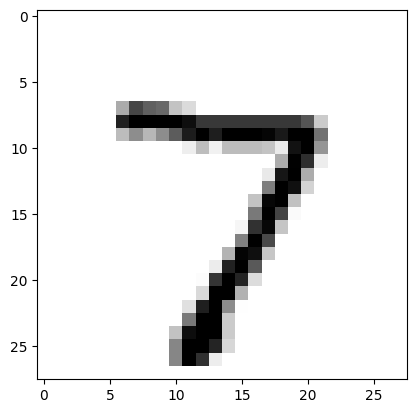

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

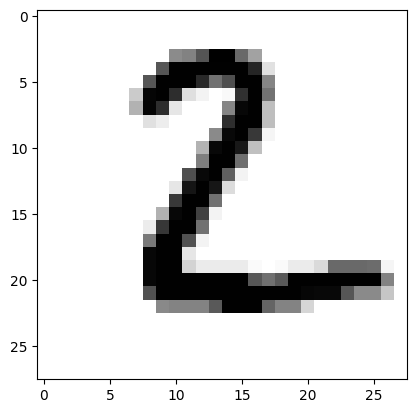

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

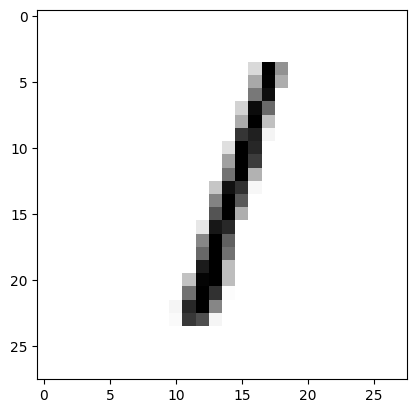

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

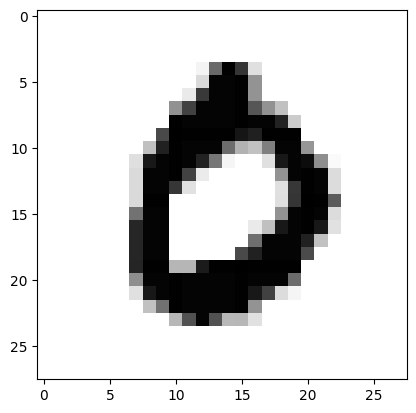

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

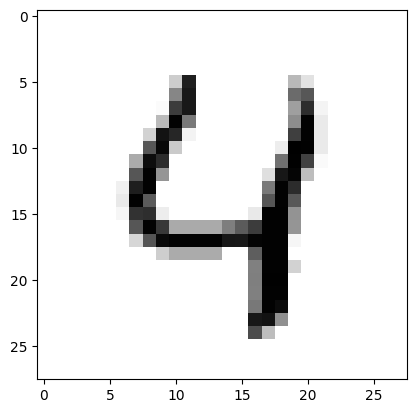

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

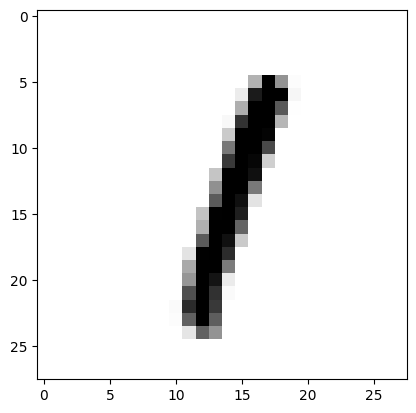

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

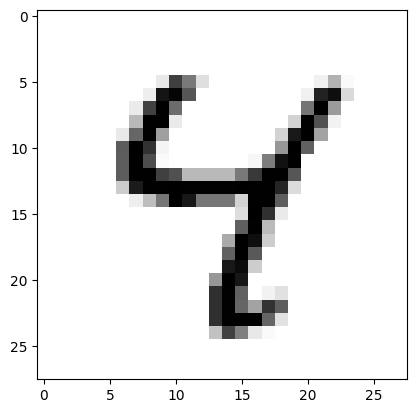

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

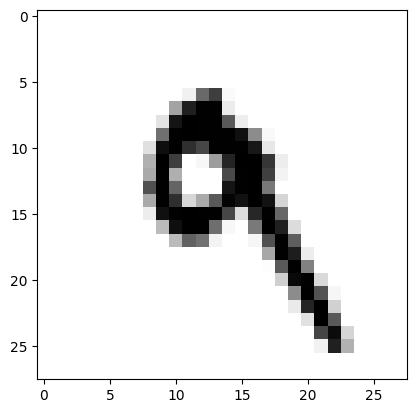

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

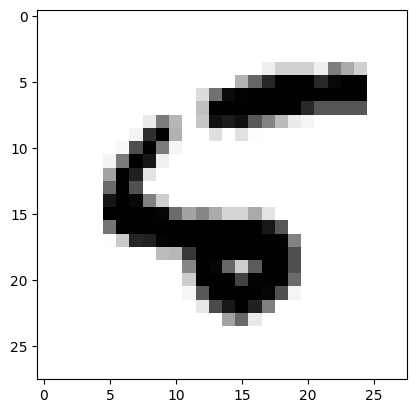

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

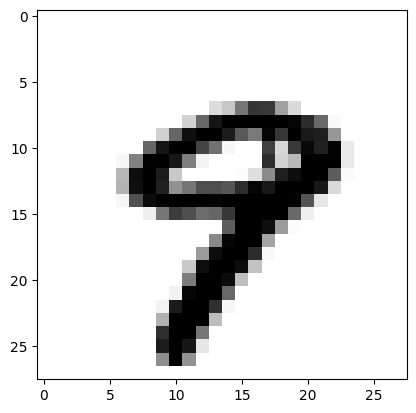

Streaming output truncated to the last 5000 lines.
  0.00664141]
WeightSortArray1D= [-0.04962333 -0.04406928 -0.04058085 -0.03373744 -0.03372954 -0.03278743
 -0.02360572 -0.01940084 -0.00943444 -0.00900626 -0.00447823 -0.00335479
  0.00664141  0.01028014  0.01235207  0.0135016   0.01483189  0.01668658
  0.02080256  0.0211459   0.02175638  0.02753066  0.03661324  0.03808689
  0.04244103]
DifferentialWArray= [-4.96233292e-02  5.55405021e-03  3.48843262e-03  6.84340671e-03
  7.89761543e-06  9.42111015e-04  9.18171369e-03  4.20488231e-03
  9.96639114e-03  4.28182073e-04  4.52802749e-03  1.12344045e-03
  9.99620557e-03  3.63873271e-03  2.07192916e-03  1.14952307e-03
  1.33029185e-03  1.85469445e-03  4.11598012e-03  3.43335792e-04
  6.10476360e-04  5.77428378e-03  9.08258557e-03  1.47364661e-03
  4.35413793e-03]
DicWSort= {(1, 1): -0.04962333, (4, 1): -0.04406928, (1, 4): -0.040580846, (0, 4): -0.03373744, (1, 2): -0.033729542, (3, 4): -0.03278743, (0, 1): -0.023605717, (1, 3): -0.019400835,

In [22]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))

In [23]:
network[0].weights[0]

array([[[-3.02456859e-02,  9.76970196e-02,  9.06794053e-03,
         -9.21363384e-02,  1.64087698e-01],
        [-8.57898742e-02,  1.22724414e-01,  1.10663489e-01,
         -9.44772959e-02,  7.73197412e-02],
        [-6.20741621e-02, -3.74130979e-02, -1.75230667e-01,
         -2.19106678e-05, -9.89146251e-03],
        [-4.58517335e-02,  1.72209427e-01,  1.47654876e-01,
         -1.01243787e-01, -1.63190827e-01],
        [ 2.89375782e-02, -6.10857978e-02, -7.60185495e-02,
          7.97973201e-02, -6.58196211e-02]]], dtype=float32)

In [24]:
w = list(model_new.parameters())

In [25]:
w[0][0]

tensor([[[-3.0246e-02,  9.7697e-02,  9.0679e-03, -9.2136e-02,  1.6409e-01],
         [-8.5790e-02,  1.2272e-01,  1.1066e-01, -9.4477e-02,  7.7320e-02],
         [-6.2074e-02, -3.7413e-02, -1.7523e-01, -2.1911e-05, -9.8915e-03],
         [-4.5852e-02,  1.7221e-01,  1.4765e-01, -1.0124e-01, -1.6319e-01],
         [ 2.8938e-02, -6.1086e-02, -7.6019e-02,  7.9797e-02, -6.5820e-02]]],
       grad_fn=<SelectBackward0>)